In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
data = pd.read_csv("../datasets/framingham_heart_study.csv")

In [3]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
data.shape

(4240, 16)

In [6]:
data.isnull().values.any(), data.isnull().values.sum()

(True, 645)

In [7]:
# imputation of missing values
new_data = data.fillna(method="bfill", axis=0) # axis=0 means you replace with the value in the row

In [8]:
new_data.isnull().values.any(), new_data.isnull().values.sum()

(False, 0)

In [9]:
new_data.shape

(4240, 16)

In [10]:
new_data['TenYearCHD'].value_counts() # clear indication of an imbalanced dataset

0    3596
1     644
Name: TenYearCHD, dtype: int64

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

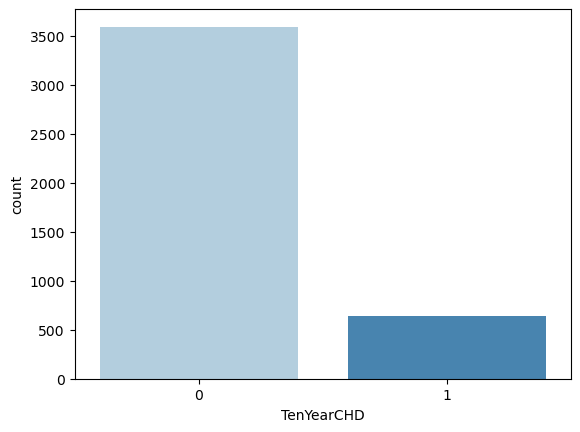

In [11]:
sns.countplot(x='TenYearCHD', data=new_data, palette='Blues')

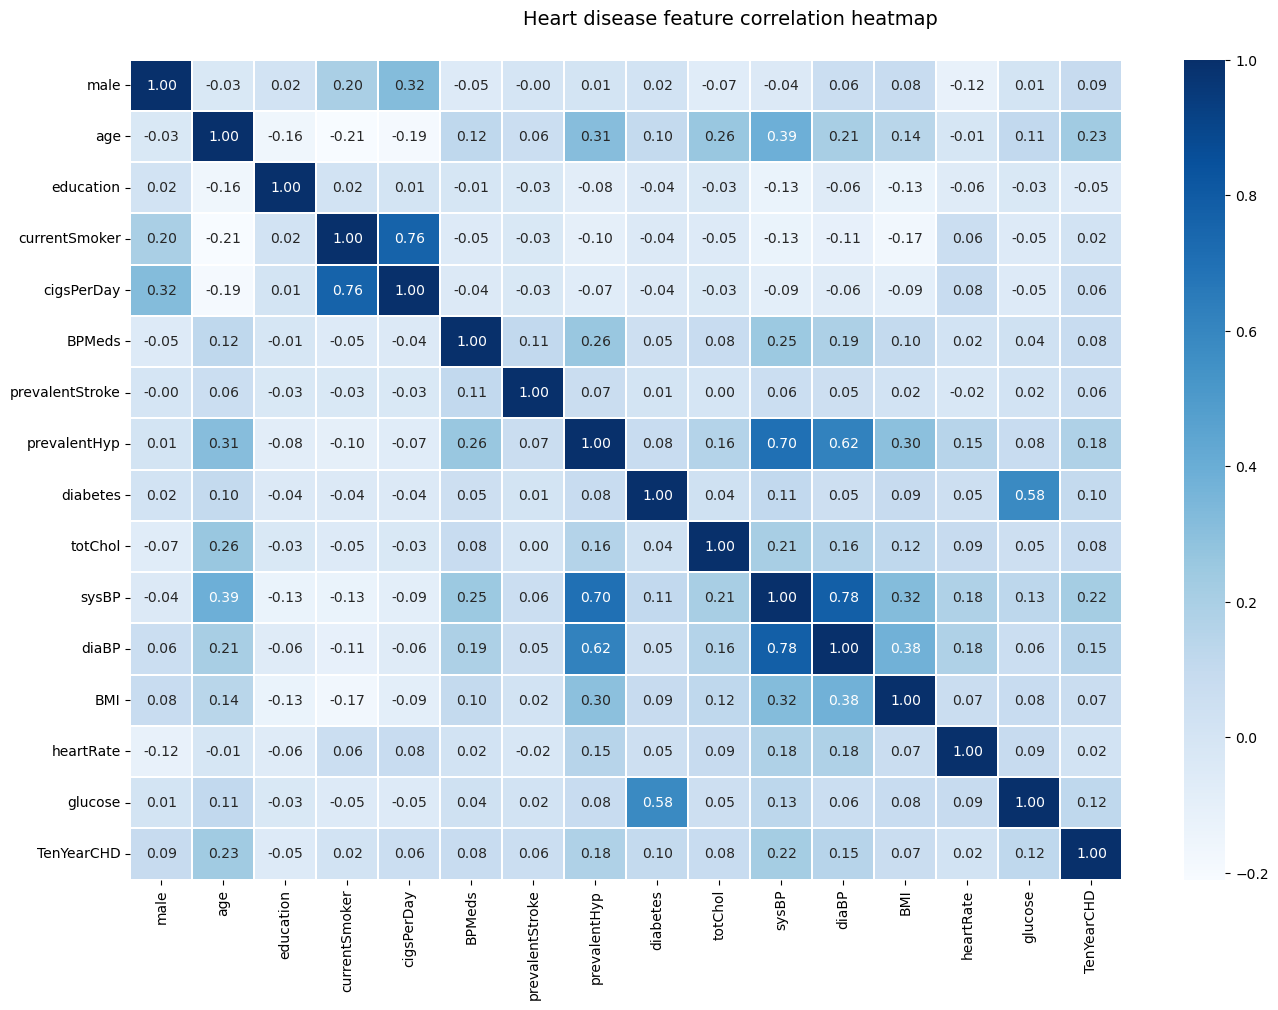

In [12]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(16, 10))
corr = new_data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Blues",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Heart disease feature correlation heatmap', fontsize=14)

<AxesSubplot:xlabel='male', ylabel='count'>

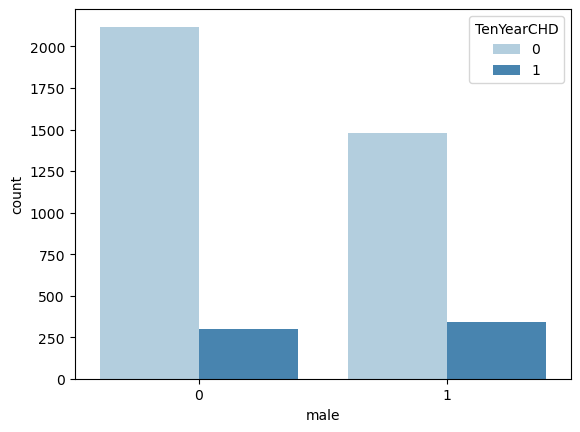

In [13]:
sns.countplot(x="male", data=new_data, palette="Blues", hue="TenYearCHD")

<function matplotlib.pyplot.show(close=None, block=None)>

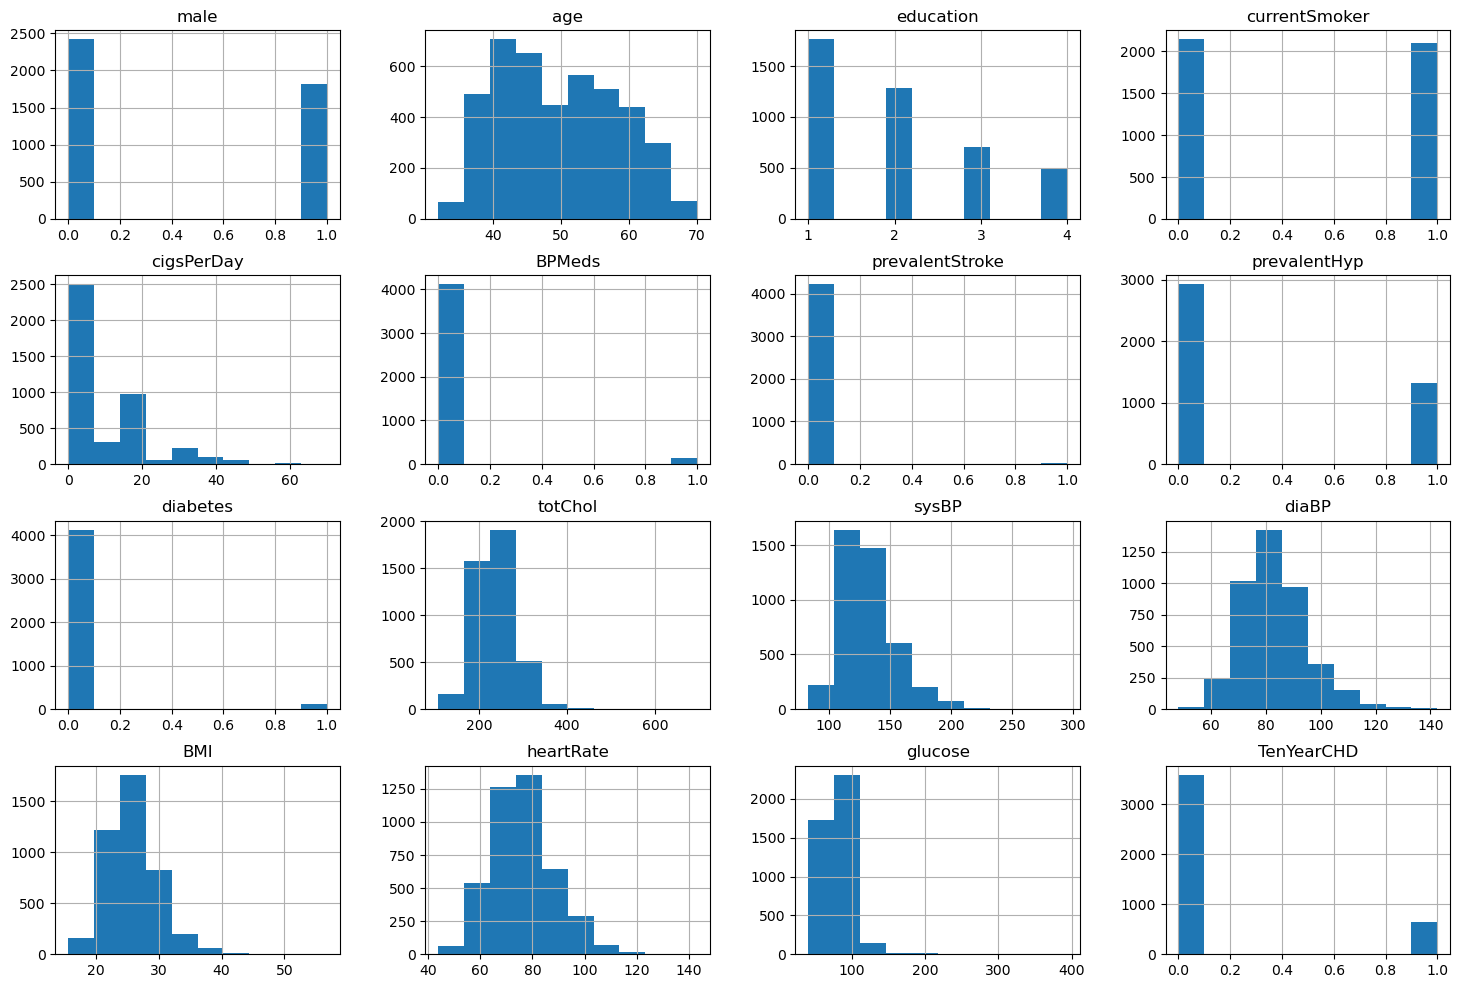

In [14]:
new_data.hist(figsize=(18,12))
plt.show

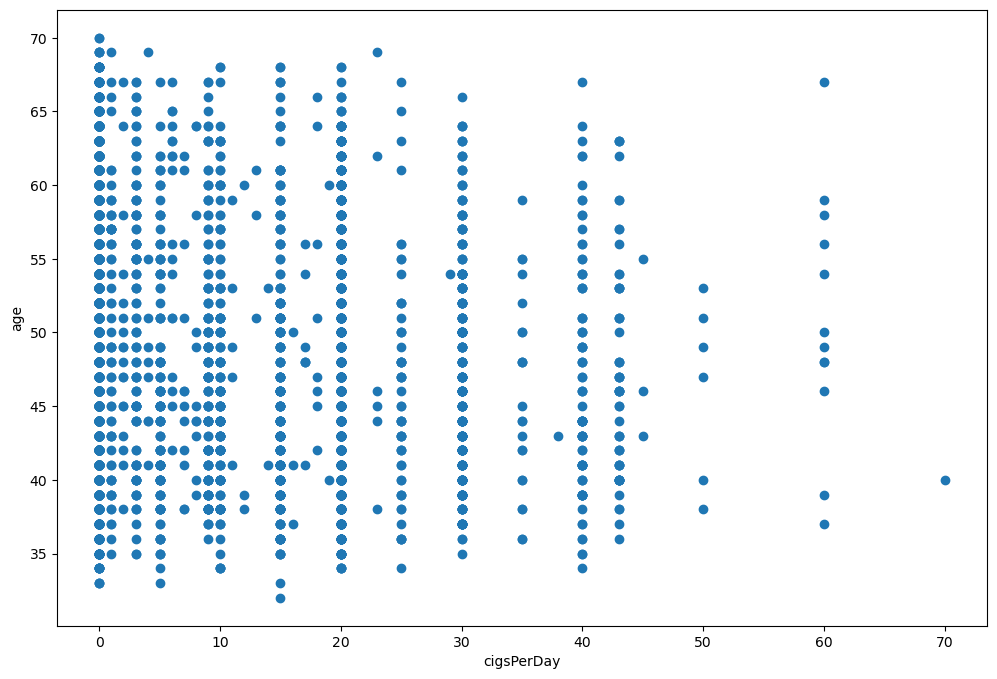

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(new_data['cigsPerDay'], new_data['age'])
ax.set_xlabel('cigsPerDay')
ax.set_ylabel('age')
plt.show()

Text(0.5, 1.0, 'Visualization of outliers in FHS data set')

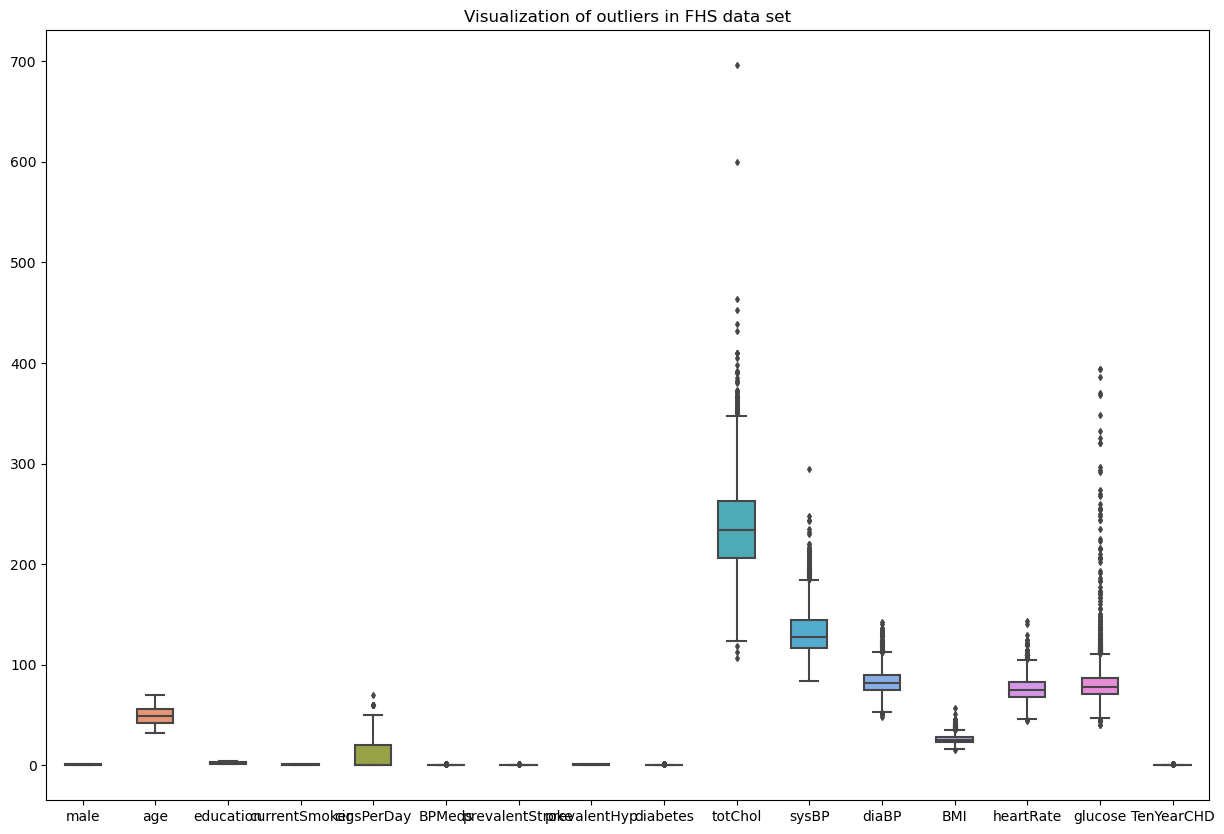

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=new_data, width= 0.5,ax=ax,  fliersize=3)
plt.title("Visualization of outliers in FHS data set")

<AxesSubplot:>

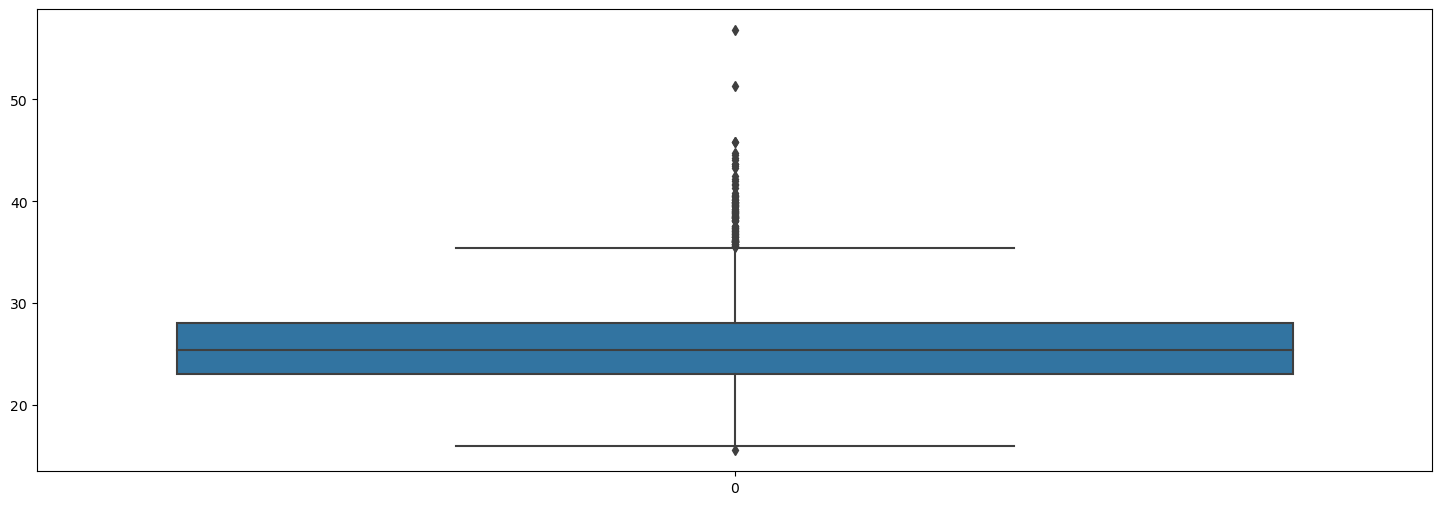

In [17]:
plt.figure(figsize=(18,6))
sns.boxplot(new_data['BMI'])

In [18]:
new_data2 = new_data[new_data['glucose'] < new_data['glucose'].std()*3]


In [19]:
new_data['glucose'].max(), new_data2['glucose'].max()

(394.0, 71.0)

In [20]:
# determining lower and upper quartiles
# lower_quartile = new_data['glucose'].quantile(.25)
# upper_quartile = new_data['glucose'].quantile(.75)
# print("Q1:", lower_quartile)
# print("Q3:", upper_quartile)

# determining lower and upper quartiles
Q1 = new_data.quantile(0.25)
Q3 = new_data.quantile(0.75)


In [21]:
# IQR for each feature
IQR = Q3 - Q1
print(IQR)

male                1.00
age                14.00
education           2.00
currentSmoker       1.00
cigsPerDay         20.00
BPMeds              0.00
prevalentStroke     0.00
prevalentHyp        1.00
diabetes            0.00
totChol            57.00
sysBP              27.00
diaBP              15.00
BMI                 4.97
heartRate          15.00
glucose            16.00
TenYearCHD          0.00
dtype: float64


In [22]:
# true means presence of outliers and false means absence
#print(new_data < (Q1 - 1.5 * IQR)) |(new_data > (Q3 + 1.5 * IQR))

In [23]:
# filgtering outliers
new_data2 = new_data[~((new_data < (Q1 - 1.5 * IQR)) |(new_data > (Q3 + 1.5 * IQR))).any(axis=1)]
new_data2.shape

(3120, 16)

In [24]:
# determining minimum and maximum non-outliers
#min_non_outlier = lower_quartile - 1.5*iqr
#max_non_outlier = upper_quartile + 1.5*iqr
#print("Minimum non-outlier:",min_non_outlier)
#print("Maximum non-outlier:",max_non_outlier)


# outliers = ((new_data["cigsPerDay"]< -30) | (new_data["cigsPerDay"]>50) | (new_data["totChol"]<120.5) 
#           | (new_data["totChol"]>348.5) | (new_data["sysBP"]<76.5) | (new_data['sysBP']>184.5) 
#            | (new_data["diaBP"]<52.5) | (new_data['diaBP']>112.5) | (new_data['BMI']<15.6) | (new_data['BMI']>35.5) 
#            | (new_data["heartRate"]<68) | (new_data['heartRate']>83) | (new_data["glucose"]<=47) | (new_data['glucose']>111))
# print("There are {} outliers".format(data[outliers]["TenYearCHD"].count()))


# dropping outliers
# new_data = new_data[~outliers]

Text(0.5, 1.0, 'Visualization after dropping outliers from FHS data set')

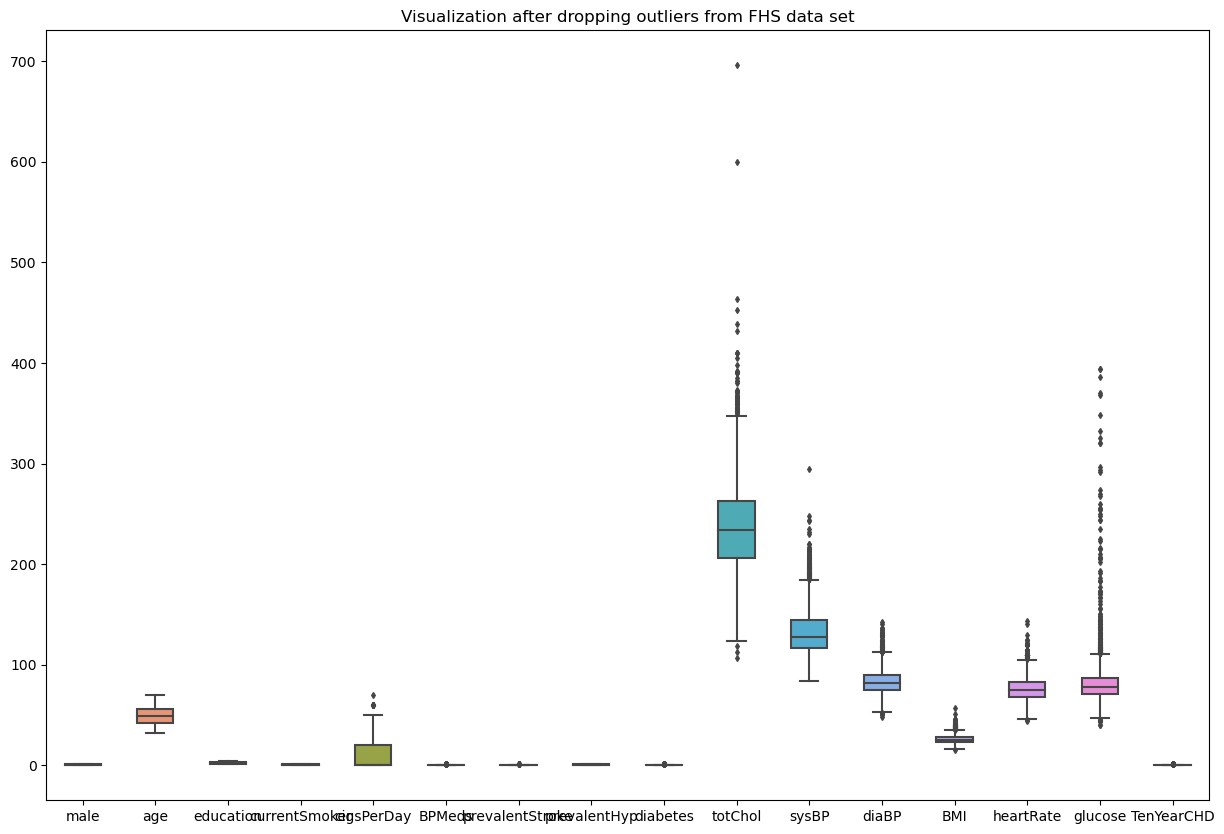

In [25]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=new_data, width= 0.5,ax=ax,  fliersize=3)
plt.title("Visualization after dropping outliers from FHS data set")

<AxesSubplot:>

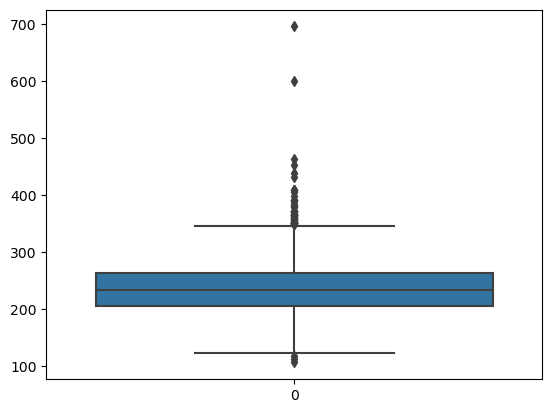

In [26]:
sns.boxplot(new_data['totChol'])

In [27]:
# using standard scaler and PCA with and without a balanced dataset
from sklearn.preprocessing import StandardScaler

In [28]:
# First step of PCA for dimesionality reduction is standard normalization.
# (checking if features follow a gaussian distribution where mean=0, std=1),
scaler = StandardScaler()
scaler.fit(new_data)

StandardScaler()

In [29]:
# all values are converted to same scale
scaled_new_data = scaler.transform(new_data)

In [30]:
# PCA for dimension reduction
from sklearn.decomposition import PCA

In [31]:
# n_components=2 means we convert number of features to 2
# If 0 < n_components < 1 and svd_solver == 'full', select the number of components 
# such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.
# pca = PCA(n_components=6, svd_solver='full')
pca = PCA(n_components=9)

In [32]:
pca.fit(scaled_new_data)

PCA(n_components=9)

In [33]:
# transforming scaled data so that we reduce number of features
x_pca = pca.transform(scaled_new_data)

In [34]:
print(x_pca)

[[-1.88330615 -1.00877129  0.04138475 ... -0.83930203 -0.17053684
   0.95391094]
 [-0.12966797 -1.34340652 -0.22539497 ...  0.48978243  0.12048517
   0.74397601]
 [-1.02683895  1.40370557 -0.21170218 ...  0.65031504  0.68426598
  -0.15513432]
 ...
 [ 0.04367643 -1.53194827  0.62610214 ... -0.35189611  0.01789659
   0.1626321 ]
 [ 0.66719924 -0.30216686 -1.00979071 ... -0.56693969 -0.57190411
   0.15854831]
 [-1.62088732  1.4547887  -0.16497419 ... -0.20190317 -0.75606332
  -0.06312442]]


In [35]:
scaled_new_data.shape

(4240, 16)

In [36]:
# shape of scaled data before dimension reduction
x_pca.shape

(4240, 9)

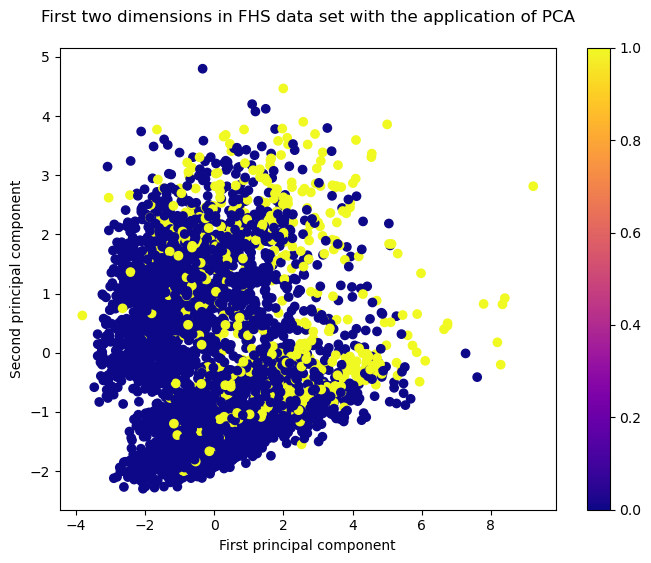

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=new_data["TenYearCHD"], cmap="plasma")
plt.title("First two dimensions in FHS data set with the application of PCA\n")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.colorbar()

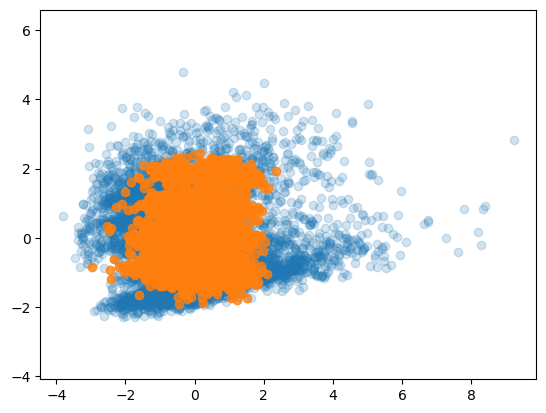

In [38]:
# new reduced dimensions vs initial data before dimension reduction
X_new = pca.inverse_transform(x_pca)
plt.scatter(x_pca[:, 0], x_pca[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 2], alpha=0.8)
plt.axis('equal');

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

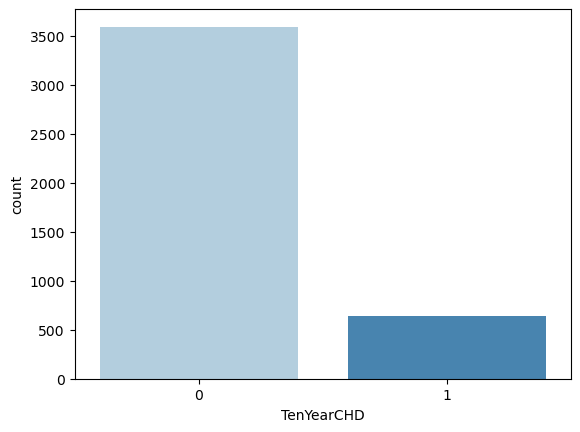

In [39]:
sns.countplot(x='TenYearCHD', data=new_data, palette='Blues')

In [40]:
# defining independent and dependent variables
X = x_pca
y = new_data["TenYearCHD"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

### After oversampling and PCA

In [42]:
# After oversampling and PCA
# oversampling with SMOTE
from imblearn.over_sampling import SMOTE, ADASYN

In [43]:
sm = SMOTE(random_state=100)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [44]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

print("********************************************")

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("********************************************")

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 524
Before OverSampling, counts of label '0': 2868 

********************************************
After OverSampling, the shape of train_X: (5736, 9)
After OverSampling, the shape of train_y: (5736,) 

********************************************
After OverSampling, counts of label '1': 2868
After OverSampling, counts of label '0': 2868


In [45]:
# svm classifier
svm_clf = SVC(kernel="linear", C=3.0)

In [46]:
import time
start = time.time()

#fitting the classifier
svm_clf.fit(X_train_res, y_train_res)

end = time.time()
print(end - start, "seconds")

0.2472372055053711 seconds


In [47]:
y_pred2 = svm_clf.predict(X_test)

In [48]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.9893867924528302


/Users/momanyibiffon/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


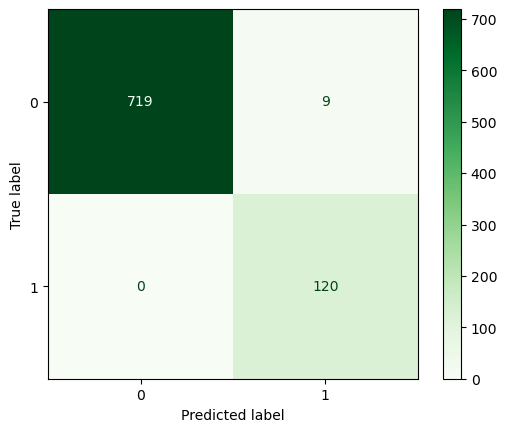

In [49]:
from sklearn.metrics import plot_confusion_matrix
print(plot_confusion_matrix(svm_clf, X_test, y_test, cmap=plt.cm.Greens))

In [50]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       728
           1       0.93      1.00      0.96       120

    accuracy                           0.99       848
   macro avg       0.97      0.99      0.98       848
weighted avg       0.99      0.99      0.99       848



Component: 1
Accuracy: 0.6863207547169812
              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1094
           1       0.23      0.54      0.32       178

    accuracy                           0.69      1272
   macro avg       0.57      0.62      0.56      1272
weighted avg       0.81      0.69      0.73      1272

********************
Component: 2
Accuracy: 0.7169811320754716
              precision    recall  f1-score   support

           0       0.93      0.72      0.82      1094
           1       0.28      0.67      0.40       178

    accuracy                           0.72      1272
   macro avg       0.61      0.70      0.61      1272
weighted avg       0.84      0.72      0.76      1272

********************
Component: 3
Accuracy: 0.7869496855345912
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      1094
           1       0.38      0.81      0.52       178

    accuracy  

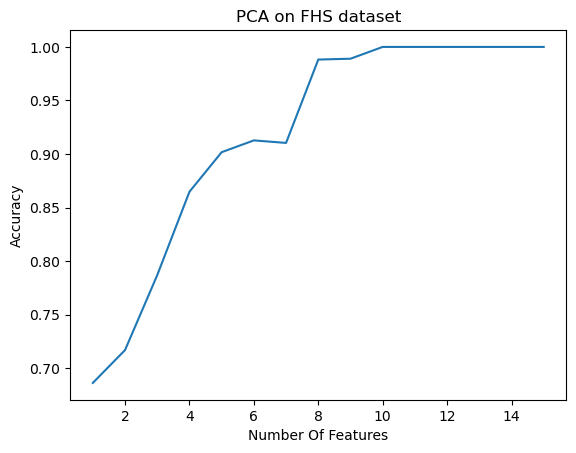

In [51]:
# finding the best number of components after oversampling with SMOTE
components = []
accuracies = []
for component in range(1,16):
    pca = PCA(n_components=component)
    pca.fit(scaled_new_data)
    x_pca = pca.transform(scaled_new_data)
    X = x_pca
    y = new_data["TenYearCHD"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
    
    # fitting the training set with SMOTE
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

    svm_clf = SVC(kernel="linear").fit(X_train_res, y_train_res)
    y_pred = svm_clf.predict(X_test)
    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    components.append(component)
    accuracies.append(accuracy)
    print("Component:",component)
    print("Accuracy:",accuracy)
    print(classification_report(y_test, y_pred))
    print("********************")

#We can see the best number of features
plt.title("PCA on FHS dataset")
plt.xlabel("Number Of Features")
plt.ylabel("Accuracy")
plt.plot(components, accuracies)
plt.show()

/Users/momanyibiffon/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


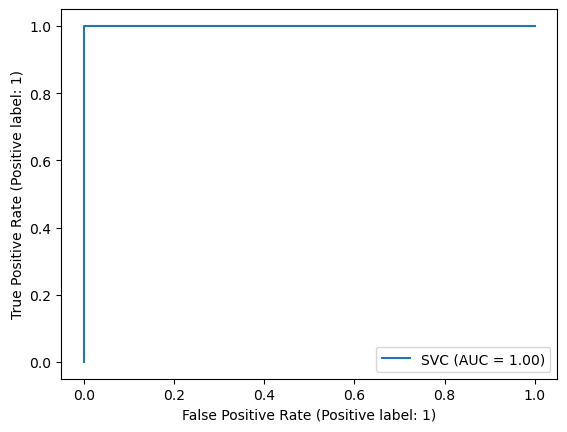

In [52]:
# ROC curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(svm_clf,X_test,y_test)